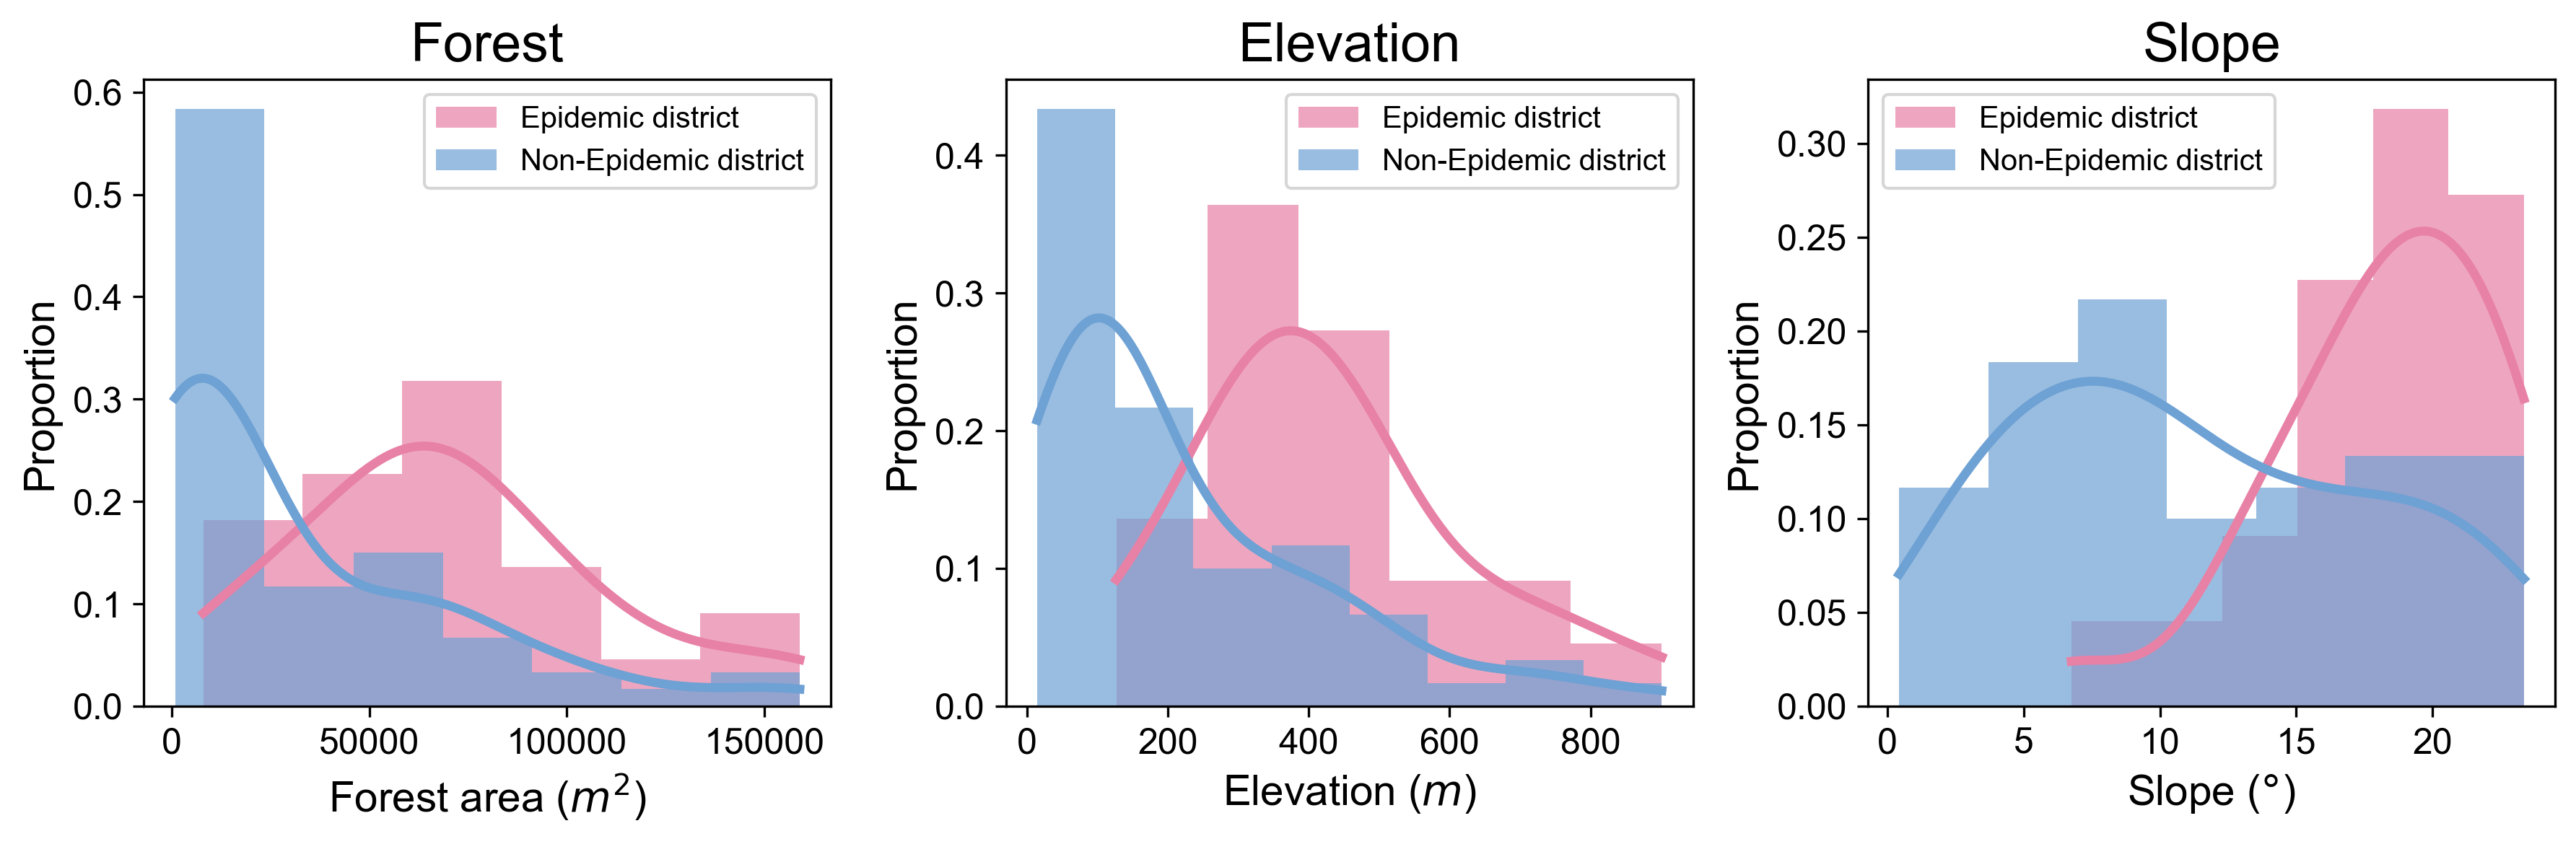

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import os

os.chdir("../Data")

file_name = '경기강원_상하반기.xlsx'

plt.rcParams['font.family']='Arial'

bar_width=0.25
plt.rc('axes', labelsize=11)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rc('legend', fontsize=8)
plt.rc('figure', titlesize=10) 
title_size = 18
label_size = 14
point_alpha = 0.8

color_vs = ['#E881A6', '#6EA1D4']
color_year2 = ['#FFBE98', '#FFA74F', '#E881A6', '#60C8B3', '#6EA1D4']
color_year = ['#EFCFBA', '#FFB2A5', '#FA9A85',  '#DE8286', '#F97272']

set_dpi=300

data = pd.read_excel(file_name)

full_asf_regions = data.loc[data['NUMPOINTS'] > 5, 'SIG_ENG_NM_x'].unique()
asf_regions = data.loc[data['NUMPOINTS'] > 0, 'SIG_ENG_NM_x'].unique()
asf_not_regions = data.loc[data['NUMPOINTS'] == 0, 'SIG_ENG_NM_x'].unique()

full_asf_df = data.loc[data['SIG_ENG_NM_x'].isin(full_asf_regions), ['SIG_ENG_NM_x', 'forest', 'dem', 'slope', 'x', 'y', 'farm_cnt']].sort_values(by='SIG_ENG_NM_x')
asf_df = data.loc[data['SIG_ENG_NM_x'].isin(asf_regions), ['SIG_ENG_NM_x', 'forest', 'dem', 'slope', 'x', 'y', 'farm_cnt']].sort_values(by='SIG_ENG_NM_x')
asfnot_df = data.loc[data['SIG_ENG_NM_x'].isin(asf_not_regions), ['SIG_ENG_NM_x', 'forest', 'dem', 'slope', 'x', 'y', 'farm_cnt']].sort_values(by='SIG_ENG_NM_x')


group1 = asf_df.drop_duplicates()
group2 = asfnot_df.drop_duplicates()
group3 = full_asf_df.drop_duplicates()

index1 = np.arange(len(group1))
index2 = np.arange(len(group1), len(group1)+len(group2))
index3 = np.arange(len(group1)+len(group2), len(group1)+len(group2)+len(group3))

group1.index = index1
group2.index = index2
group3.index = index3

fig, ax = plt.subplots(1, 3, dpi = set_dpi, figsize = (12, 4))
ax = ax.ravel()
ax1 = ax[0]; ax2 = ax[1]; ax3 = ax[2]

sns.histplot(group1['forest'], ax = ax1, color = color_vs[0], alpha = 0.7, label = 'Epidemic district', 
                kde=True, fill=True, edgecolor=None, stat='proportion', line_kws={'lw':3})
sns.histplot(group2['forest'], ax = ax1, color = color_vs[1], alpha = 0.7, label = 'Non-Epidemic district', 
                kde=True, fill=True, edgecolor=None, stat='proportion', line_kws={'lw':3})
ax1.set_xlabel(r'Forest area ($m^2$)', fontsize = label_size)
ax1.set_ylabel('Proportion', fontsize = label_size)
ax1.set_title('Forest', fontsize = title_size)
ax1.legend(fontsize=10)

sns.histplot(group1['dem'], ax = ax2, color = color_vs[0], alpha = 0.7, label = 'Epidemic district',
                kde=True, fill=True, edgecolor=None, stat='proportion', line_kws={'lw':3})
sns.histplot(group2['dem'], ax = ax2, color = color_vs[1], alpha = 0.7, label = 'Non-Epidemic district',
                kde=True, fill=True, edgecolor=None, stat='proportion', line_kws={'lw':3})
ax2.set_xlabel(r'Elevation ($m$)', fontsize = label_size)
ax2.set_ylabel('Proportion', fontsize = label_size)
ax2.set_title('Elevation', fontsize = title_size)
ax2.legend(fontsize=10)

sns.histplot(group1['slope'], ax = ax3, color = color_vs[0], alpha = 0.7, label = 'Epidemic district',
                kde=True, fill=True, edgecolor=None, stat='proportion', line_kws={'lw':3})
sns.histplot(group2['slope'], ax = ax3, color = color_vs[1], alpha = 0.7, label = 'Non-Epidemic district',
                kde=True, fill=True, edgecolor=None, stat='proportion', line_kws={'lw':3})
ax3.set_xlabel(r'Slope ($\degree$)', fontsize = label_size)
ax3.set_ylabel('Proportion', fontsize = label_size)
ax3.set_title('Slope', fontsize = title_size)
ax3.legend(fontsize=10)

plt.tight_layout()
plt.show()

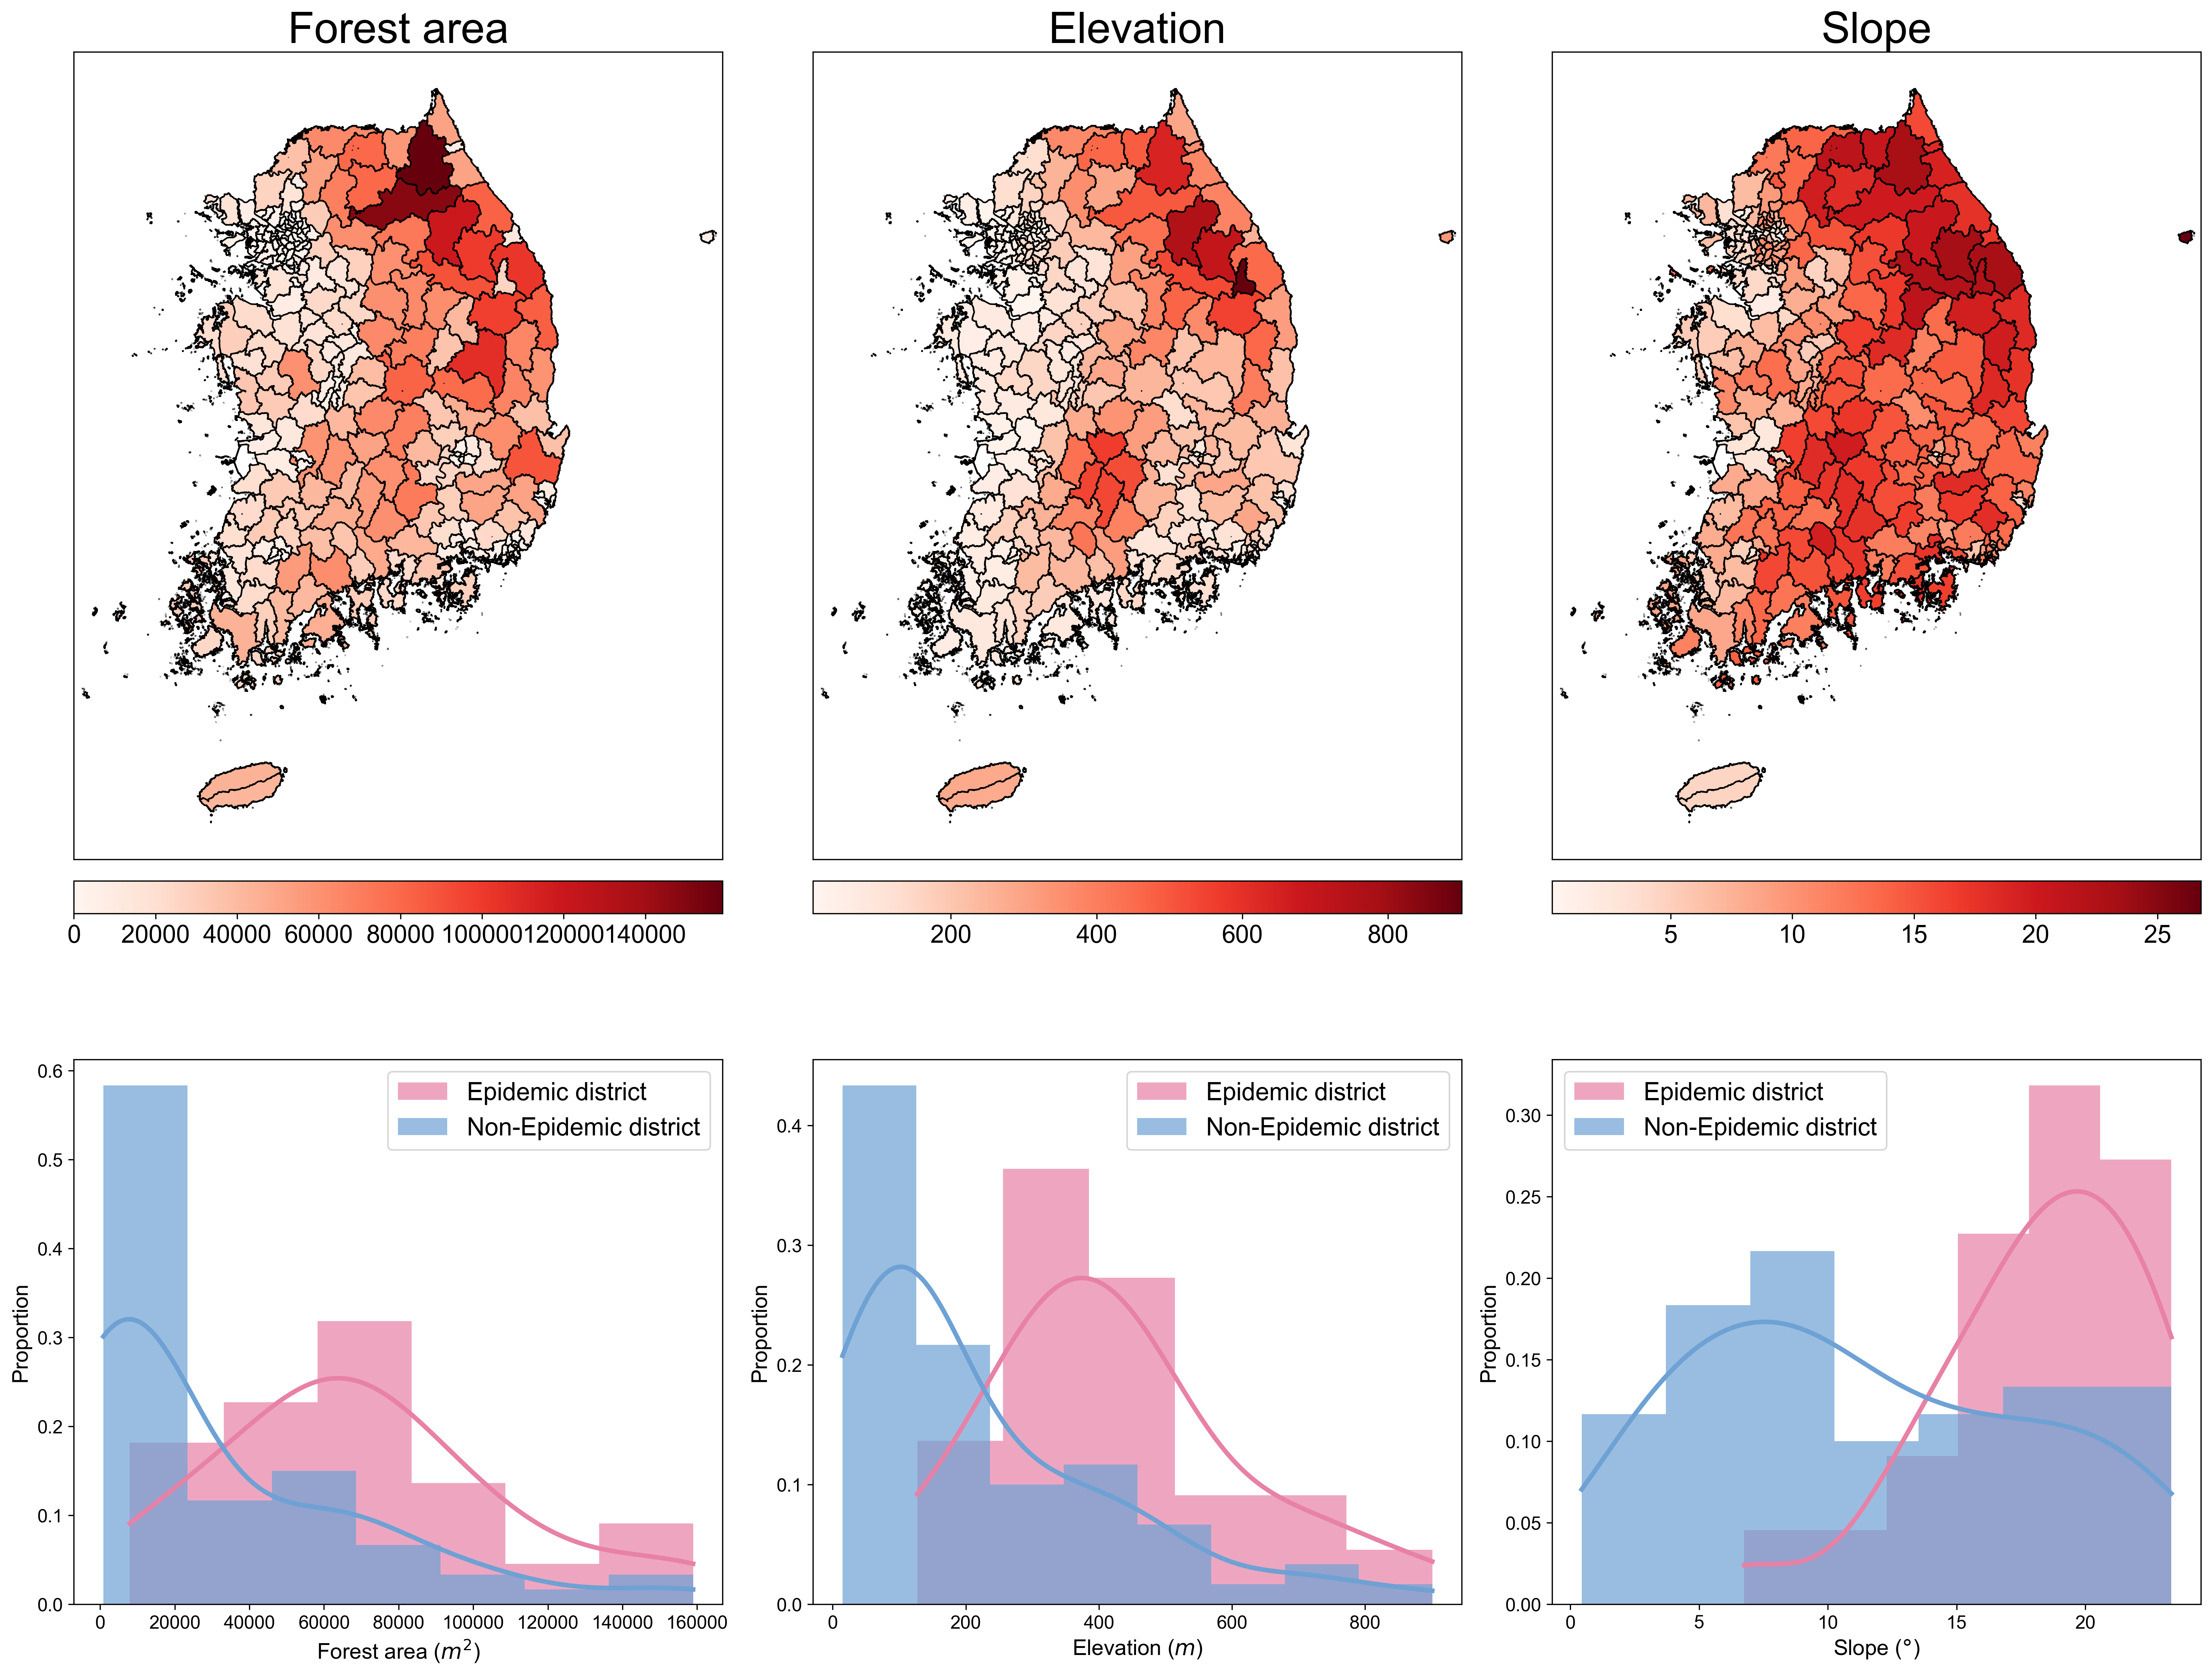

In [4]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
import numpy as np
import os

os.chdir("../Data")

plt.rcParams['font.family'] = 'Arial'

bar_width = 0.25
plt.rc('axes', labelsize=11)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=8)
plt.rc('figure', titlesize=10)
title_size = 22
label_size = 14
point_alpha = 0.8

# color setting
color_vs = ['#E881A6', '#6EA1D4']
color_year2 = ['#FFBE98', '#FFA74F', '#E881A6', '#60C8B3', '#6EA1D4']
color_year = ['#EFCFBA', '#FFB2A5', '#FA9A85',  '#DE8286', '#F97272']

set_dpi = 300

location = pd.read_csv('ASF_WildBoar_Update.csv')
korea2 = gpd.read_file('ctprvn.shp')
korea2.crs = "EPSG:5179"
korea2 = korea2.to_crs(epsg=4326)

korea = gpd.read_file('sig_5179.shp')
korea = korea.to_crs(epsg=4326)

stage1 = ["파주시", "양주시", "연천군", "포천시", "가평군", "철원군", "춘천시", "화천군", "양구군", "인제군", "고성군",
          "양구군", "인제군", '홍천군']
stage2 = ["파주시", "양주시", "연천군", "포천시", "가평군", "춘천시", "화천군", "인제군", "양양군", "강릉시", "동해시",
          "평창군", "영월군", "정선군", "횡성군", "문경시", "단양군", "예천군", "영주시", "봉화군", "울진군"]
stage3 = ["음성군", "충주시", "괴산군", "보은군", "상주시", "의성군", "안동시", "청송군", "영덕군"]

korea['stage1'] = 0
korea['stage2'] = 0
korea['stage3'] = 0

special_index = 133

for idx, row in korea.iterrows():
    if row['SIG_KOR_NM'] in stage1:
        if row['SIG_KOR_NM'] == '고성군' and idx != special_index:
            continue
        korea.at[idx, 'stage1'] = 1
    if row['SIG_KOR_NM'] in stage2:
        if row['SIG_KOR_NM'] == '고성군' and idx != special_index:
            continue
        korea.at[idx, 'stage2'] = 1
    if row['SIG_KOR_NM'] in stage3:
        if row['SIG_KOR_NM'] == '고성군' and idx != special_index:
            continue
        korea.at[idx, 'stage3'] = 1

location.loc[location['경도'].str[-2] == '.', '경도'] = 128.3489
location['위도'] = location['위도'].str.replace(',', '')
location['경도'] = location['경도'].astype(float)
location['위도'] = location['위도'].astype(float)

location['확진'] = pd.to_datetime(location['확진'], format='%Y-%m-%d')
location = location.rename(columns={'위도': 'y', '경도': 'x'}, inplace=False)

location_2019 = location.query('확진 < "2020-01-01"')
location_2020 = location.query('확진 >= "2020-01-01" & 확진 < "2021-01-01"')
location_2021 = location.query('확진 >= "2021-01-01" & 확진 < "2022-01-01"')
location_2022 = location.query('확진 >= "2022-01-01" & 확진 < "2023-01-01"')
location_2023 = location.query('확진 >= "2023-01-01" & 확진 < "2024-01-01"')

korea3 = gpd.read_file("DEM.shp")
korea3.rename(columns={'_mean': 'dem'}, inplace=True)
slope = gpd.read_file("경사도.shp")
slope.rename(columns={'_mean': 'slope'}, inplace=True)

korea3 = korea3.merge(slope[['SIG_CD', 'slope']], on='SIG_CD', how='left')
area = pd.read_excel("forest_area.xlsx")
area.rename(columns={'행정구역(2)': 'SIG', '산림면적': 'forest'}, inplace=True)
area['SIG_CD'] = area['SIG_CD'].astype(str)
korea3 = korea3.merge(area[['SIG_CD', 'forest_area', 'forest_ratio']], on='SIG_CD', how='left')
korea3 = korea3.to_crs(epsg=4326)

file_name = '경기강원_상하반기.xlsx'
data = pd.read_excel(file_name)

full_asf_regions = data.loc[data['NUMPOINTS'] > 5, 'SIG_ENG_NM_x'].unique()
asf_regions = data.loc[data['NUMPOINTS'] > 0, 'SIG_ENG_NM_x'].unique()
asf_not_regions = data.loc[data['NUMPOINTS'] == 0, 'SIG_ENG_NM_x'].unique()

full_asf_df = data.loc[data['SIG_ENG_NM_x'].isin(full_asf_regions), ['SIG_ENG_NM_x', 'forest', 'dem', 'slope', 'x', 'y', 'farm_cnt']].sort_values(by='SIG_ENG_NM_x')
asf_df = data.loc[data['SIG_ENG_NM_x'].isin(asf_regions), ['SIG_ENG_NM_x', 'forest', 'dem', 'slope', 'x', 'y', 'farm_cnt']].sort_values(by='SIG_ENG_NM_x')
asfnot_df = data.loc[data['SIG_ENG_NM_x'].isin(asf_not_regions), ['SIG_ENG_NM_x', 'forest', 'dem', 'slope', 'x', 'y', 'farm_cnt']].sort_values(by='SIG_ENG_NM_x')

group1 = asf_df.drop_duplicates()
group2 = asfnot_df.drop_duplicates()
group3 = full_asf_df.drop_duplicates()

index1 = np.arange(len(group1))
index2 = np.arange(len(group1), len(group1) + len(group2))
index3 = np.arange(len(group1) + len(group2), len(group1) + len(group2) + len(group3))

group1.index = index1
group2.index = index2
group3.index = index3

fig = plt.figure(figsize=(20, 24), dpi=set_dpi)

gs = fig.add_gridspec(2, 3, height_ratios=[4, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

ax1.set_title('Forest area', fontsize=title_size + 6)
korea3.plot(column='forest_area', ax=ax1, legend=False, cmap='Reds', edgecolor='black')
ax1.set_xlim([125, 131])
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=korea3['forest_area'].min(), vmax=korea3['forest_area'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax1, shrink=1, orientation='horizontal', pad=0.01)
cbar.ax.tick_params(labelsize=16)
num_ticks = 4
cbar.set_ticks(np.linspace(korea3['forest_area'].min(), korea3['forest_area'].max(), num_ticks))
ax1.set_xticks([])
ax1.set_yticks([])

ax2.set_title('Elevation', fontsize=title_size + 6)
korea3.plot(column='dem', ax=ax2, legend=False, cmap='Reds', edgecolor='black')
ax2.set_xlim([125, 131])
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=korea3['dem'].min(), vmax=korea3['dem'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax2, shrink=1, orientation='horizontal', pad=0.01)
cbar.ax.tick_params(labelsize=16) 
num_ticks = 4
cbar.set_ticks(np.linspace(korea3['forest_area'].min(), korea3['forest_area'].max(), num_ticks))
ax2.set_xticks([])
ax2.set_yticks([])

ax3.set_title('Slope', fontsize=title_size + 6)
korea3.plot(column='slope', ax=ax3, legend=False, cmap='Reds', edgecolor='black')
ax3.set_xlim([125, 131])
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=korea3['slope'].min(), vmax=korea3['slope'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax3, shrink=1, orientation='horizontal', pad=0.01)
cbar.ax.tick_params(labelsize=16) 
ax3.set_xticks([])
ax3.set_yticks([])

ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])

sns.histplot(group1['forest'], ax=ax4, color=color_vs[0], alpha=0.7, label='Epidemic district', kde=True, fill=True, edgecolor=None, stat='proportion', line_kws={'lw': 3})
sns.histplot(group2['forest'], ax=ax4, color=color_vs[1], alpha=0.7, label='Non-Epidemic district', kde=True, fill=True, edgecolor=None, stat='proportion', line_kws={'lw': 3})
ax4.set_xlabel(r'Forest area ($m^2$)', fontsize=label_size)
ax4.set_ylabel('Proportion', fontsize=label_size)
#ax4.set_title('Forest', fontsize=title_size)
ax4.legend(fontsize=10 + 6)

sns.histplot(group1['dem'], ax=ax5, color=color_vs[0], alpha=0.7, label='Epidemic district', kde=True, fill=True, edgecolor=None, stat='proportion', line_kws={'lw': 3})
sns.histplot(group2['dem'], ax=ax5, color=color_vs[1], alpha=0.7, label='Non-Epidemic district', kde=True, fill=True, edgecolor=None, stat='proportion', line_kws={'lw': 3})
ax5.set_xlabel(r'Elevation ($m$)', fontsize=label_size)
ax5.set_ylabel('Proportion', fontsize=label_size)
#ax5.set_title('Elevation', fontsize=title_size)
ax5.legend(fontsize=10 + 6)

sns.histplot(group1['slope'], ax=ax6, color=color_vs[0], alpha=0.7, label='Epidemic district', kde=True, fill=True, edgecolor=None, stat='proportion', line_kws={'lw': 3})
sns.histplot(group2['slope'], ax=ax6, color=color_vs[1], alpha=0.7, label='Non-Epidemic district', kde=True, fill=True, edgecolor=None, stat='proportion', line_kws={'lw': 3})
ax6.set_xlabel(r'Slope ($\degree$)', fontsize=label_size)
ax6.set_ylabel('Proportion', fontsize=label_size)
#ax6.set_title('Slope', fontsize=title_size)
ax6.legend(fontsize=10 + 6) 

plt.tight_layout()
plt.show()